In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.formula.api as smf 
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

In [4]:
df=pd.read_csv('Cars24.csv',index_col=0)
df

,City,Year,Company,Model,Variant,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,Original_Price,Discount,On_Road_Price,Ex_Showroom_Price
0,Kolkata,2020,MARUTI,SWIFT,VXI,2944,1,Petrol,474000,682149,67350,614799,600901
1,Kolkata,2022,MAHINDRA,BOLERO NEO,N 10,1271,1,Diesel,474000,1227549,21150,1206399,1196711
2,Kolkata,2018,MARUTI,SWIFT,VXI,79345,1,Petrol,715000,557099,72800,484299,470401
3,Kolkata,2010,HYUNDAI,SANTRO XING,GL,46556,2,Petrol,72000,166299,0,166299,152401
4,Kolkata,2018,HYUNDAI,EON,MAGNA PLUS,2624,1,Petrol,468000,337399,0,337399,327711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,Ahmedabad,2019,HYUNDAI,NEW SANTRO,1.1 SPORTS AMT,12541,1,Petrol,367000,580899,0,580899,571211
5070,Ahmedabad,2017,HYUNDAI,GRAND I10,SPORTZ 1.2 KAPPA VTVT,43676,1,Petrol,169000,518499,0,518499,504601
5071,New Delhi,2018,HONDA,AMAZE,1.2 V CVT I VTEC,11951,1,Petrol,169000,775999,8400,767599,757911
5072,New Delhi,2018,MAHINDRA,XUV500,W11 (O) AT,55280,2,Diesel,315000,1381899,0,1381899,1362492


In [5]:
df['Name']=df['Company']+df['Model']
df

,City,Year,Company,Model,Variant,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,Original_Price,Discount,On_Road_Price,Ex_Showroom_Price,Name
0,Kolkata,2020,MARUTI,SWIFT,VXI,2944,1,Petrol,474000,682149,67350,614799,600901,MARUTISWIFT
1,Kolkata,2022,MAHINDRA,BOLERO NEO,N 10,1271,1,Diesel,474000,1227549,21150,1206399,1196711,MAHINDRABOLERO NEO
2,Kolkata,2018,MARUTI,SWIFT,VXI,79345,1,Petrol,715000,557099,72800,484299,470401,MARUTISWIFT
3,Kolkata,2010,HYUNDAI,SANTRO XING,GL,46556,2,Petrol,72000,166299,0,166299,152401,HYUNDAISANTRO XING
4,Kolkata,2018,HYUNDAI,EON,MAGNA PLUS,2624,1,Petrol,468000,337399,0,337399,327711,HYUNDAIEON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,Ahmedabad,2019,HYUNDAI,NEW SANTRO,1.1 SPORTS AMT,12541,1,Petrol,367000,580899,0,580899,571211,HYUNDAINEW SANTRO
5070,Ahmedabad,2017,HYUNDAI,GRAND I10,SPORTZ 1.2 KAPPA VTVT,43676,1,Petrol,169000,518499,0,518499,504601,HYUNDAIGRAND I10
5071,New Delhi,2018,HONDA,AMAZE,1.2 V CVT I VTEC,11951,1,Petrol,169000,775999,8400,767599,757911,HONDAAMAZE
5072,New Delhi,2018,MAHINDRA,XUV500,W11 (O) AT,55280,2,Diesel,315000,1381899,0,1381899,1362492,MAHINDRAXUV500


In [6]:
df3=df[['Name','Company','City','Year','KM_Driven','No._of_Owners','Fuel_Type','Calculated_Score','Original_Price','Discount','On_Road_Price','Ex_Showroom_Price']]
df3

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,Original_Price,Discount,On_Road_Price,Ex_Showroom_Price
0,MARUTISWIFT,MARUTI,Kolkata,2020,2944,1,Petrol,474000,682149,67350,614799,600901
1,MAHINDRABOLERO NEO,MAHINDRA,Kolkata,2022,1271,1,Diesel,474000,1227549,21150,1206399,1196711
2,MARUTISWIFT,MARUTI,Kolkata,2018,79345,1,Petrol,715000,557099,72800,484299,470401
3,HYUNDAISANTRO XING,HYUNDAI,Kolkata,2010,46556,2,Petrol,72000,166299,0,166299,152401
4,HYUNDAIEON,HYUNDAI,Kolkata,2018,2624,1,Petrol,468000,337399,0,337399,327711
...,...,...,...,...,...,...,...,...,...,...,...,...
5069,HYUNDAINEW SANTRO,HYUNDAI,Ahmedabad,2019,12541,1,Petrol,367000,580899,0,580899,571211
5070,HYUNDAIGRAND I10,HYUNDAI,Ahmedabad,2017,43676,1,Petrol,169000,518499,0,518499,504601
5071,HONDAAMAZE,HONDA,New Delhi,2018,11951,1,Petrol,169000,775999,8400,767599,757911
5072,MAHINDRAXUV500,MAHINDRA,New Delhi,2018,55280,2,Diesel,315000,1381899,0,1381899,1362492


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074 entries, 0 to 5073
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               5074 non-null   object
 1   Company            5074 non-null   object
 2   City               5074 non-null   object
 3   Year               5074 non-null   int64 
 4   KM_Driven          5074 non-null   int64 
 5   No._of_Owners      5074 non-null   int64 
 6   Fuel_Type          5074 non-null   object
 7   Calculated_Score   5074 non-null   int64 
 8   Original_Price     5074 non-null   int64 
 9   Discount           5074 non-null   int64 
 10  On_Road_Price      5074 non-null   int64 
 11  Ex_Showroom_Price  5074 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 515.3+ KB


In [8]:
df3.describe()

,Year,KM_Driven,No._of_Owners,Calculated_Score,Original_Price,Discount,On_Road_Price,Ex_Showroom_Price
count,5074.000000,5074.000000,5074.000000,5.074000e+03,5.074000e+03,5074.000000,5.074000e+03,5.074000e+03
mean,2017.621206,41210.893772,1.247931,4.295598e+05,7.114958e+05,24833.571147,6.866622e+05,6.752083e+05
std,2.657087,26334.317837,0.464829,2.228237e+05,3.741656e+05,37170.672555,3.524276e+05,3.522017e+05
min,2008.000000,51.000000,1.000000,2.070000e+02,1.413990e+05,0.000000,1.350990e+05,1.225570e+05
25%,2016.000000,19970.250000,1.000000,1.810000e+05,4.566240e+05,0.000000,4.416240e+05,4.304335e+05
50%,2018.000000,37710.500000,1.000000,4.680000e+05,6.077490e+05,10350.000000,5.922990e+05,5.810060e+05
75%,2020.000000,59113.250000,1.000000,5.070000e+05,8.586740e+05,34075.000000,8.369990e+05,8.254785e+05
max,2022.000000,455601.000000,4.000000,1.698000e+06,3.242999e+06,380700.000000,3.237699e+06,3.228011e+06


In [9]:
c1=df3['Name'].value_counts()
c1.tail(50)

TATASAFARI                6
MAHINDRABOLERO            6
MGHECTOR PLUS             6
SKODAKUSHAQ               6
TOYOTAINNOVA CRYSTA       5
NISSANMICRA ACTIVE        5
NISSANTERRANO             5
HONDABR-V                 5
VOLKSWAGENTAIGUN          5
MARUTIOMNI E              4
MARUTIWAGON R             4
SKODAOCTAVIA              4
HYUNDAITUCSON NEW         4
MARUTIZEN ESTILO          4
MARUTIWAGON R STINGRAY    4
TATAPUNCH                 3
MGASTOR                   3
FORDENDEAVOUR             3
FORDNEW FIGO              3
SKODASLAVIA               3
HONDACRV                  3
TATANEXON                 2
RENAULTPULSE              2
HYUNDAIACCENT             2
TOYOTACAMRY               2
TATATIAGO NRG             2
AUDIA6                    2
MARUTIBREZZA              2
DATSUNGO PLUS             2
TOYOTAINNOVA              2
AUDIQ3                    2
KIACARENS                 2
HYUNDAIALCAZAR            2
HYUNDAINEW I20 N LINE     1
MAHINDRABOLERO NEO        1
FORDFIGO            

In [10]:
rep=c1[c1<=9].index
df2=df3[(df3['Name'].isin(rep))==True]
l=[]
for i in df2.index:
    l.append(i)

In [11]:
df3.drop(index=l,inplace=True)

In [12]:
df3=df3.reset_index(drop=True)
df3

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,Original_Price,Discount,On_Road_Price,Ex_Showroom_Price
0,MARUTISWIFT,MARUTI,Kolkata,2020,2944,1,Petrol,474000,682149,67350,614799,600901
1,MARUTISWIFT,MARUTI,Kolkata,2018,79345,1,Petrol,715000,557099,72800,484299,470401
2,HYUNDAIEON,HYUNDAI,Kolkata,2018,2624,1,Petrol,468000,337399,0,337399,327711
3,MARUTIWAGON R 1.0,MARUTI,Kolkata,2014,10953,1,Petrol,140000,356599,0,356599,344057
4,HYUNDAIELITE I20,HYUNDAI,Kolkata,2019,21415,1,Petrol,474000,537899,5000,532899,519001
...,...,...,...,...,...,...,...,...,...,...,...,...
4854,HYUNDAINEW SANTRO,HYUNDAI,Ahmedabad,2019,12541,1,Petrol,367000,580899,0,580899,571211
4855,HYUNDAIGRAND I10,HYUNDAI,Ahmedabad,2017,43676,1,Petrol,169000,518499,0,518499,504601
4856,HONDAAMAZE,HONDA,New Delhi,2018,11951,1,Petrol,169000,775999,8400,767599,757911
4857,MAHINDRAXUV500,MAHINDRA,New Delhi,2018,55280,2,Diesel,315000,1381899,0,1381899,1362492


In [13]:
df1=df3[['KM_Driven','No._of_Owners','Calculated_Score','Original_Price','On_Road_Price','Ex_Showroom_Price']]
df1

,KM_Driven,No._of_Owners,Calculated_Score,Original_Price,On_Road_Price,Ex_Showroom_Price
0,2944,1,474000,682149,614799,600901
1,79345,1,715000,557099,484299,470401
2,2624,1,468000,337399,337399,327711
3,10953,1,140000,356599,356599,344057
4,21415,1,474000,537899,532899,519001
...,...,...,...,...,...,...
4854,12541,1,367000,580899,580899,571211
4855,43676,1,169000,518499,518499,504601
4856,11951,1,169000,775999,767599,757911
4857,55280,2,315000,1381899,1381899,1362492


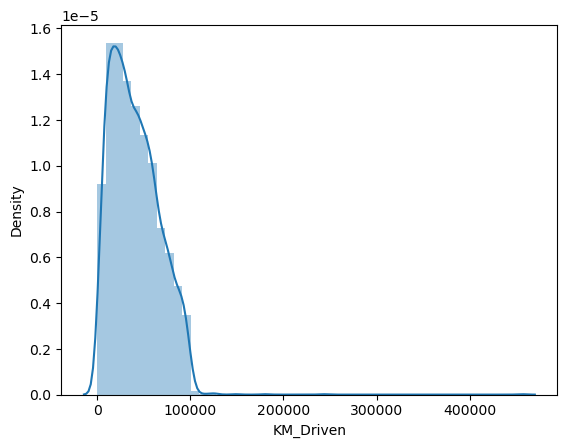

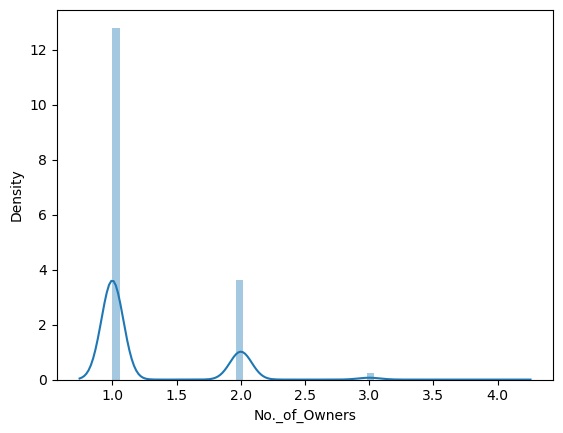

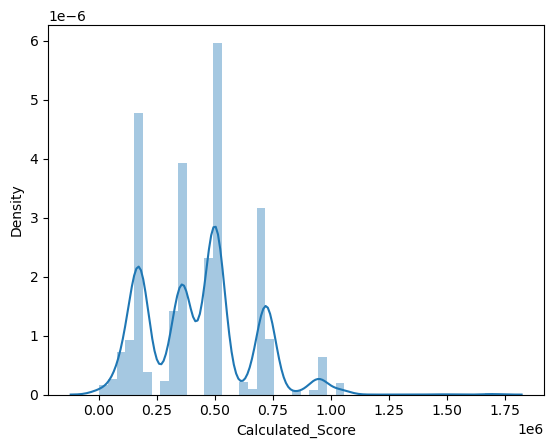

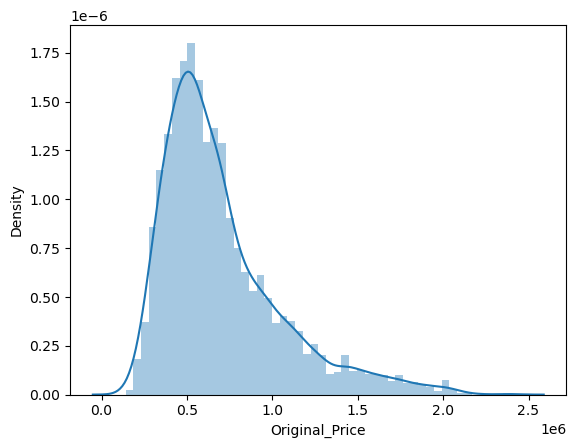

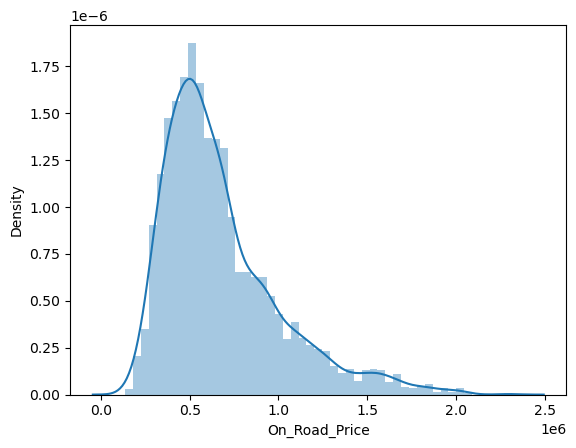

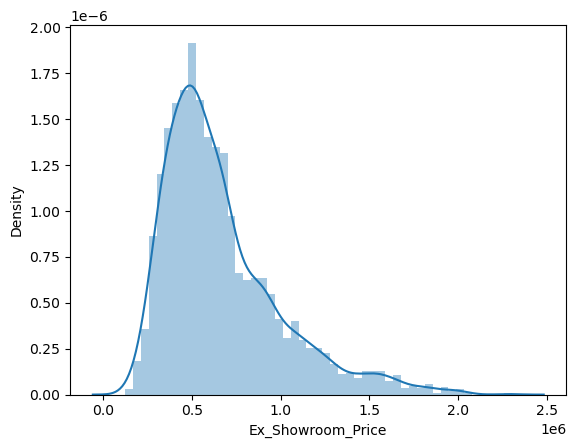

In [14]:
for i in df1.columns:
        sns.distplot(df1[i])
        plt.show()

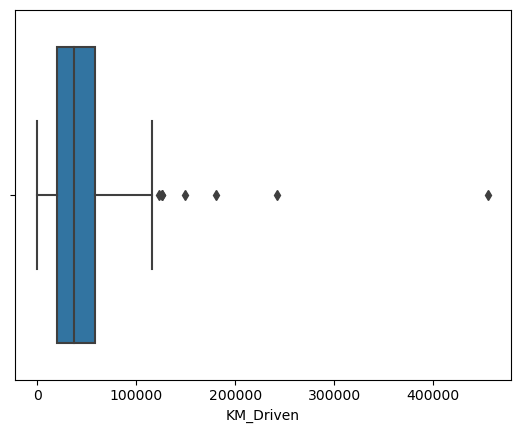

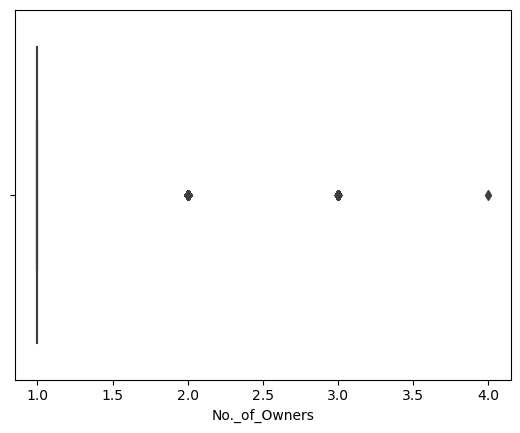

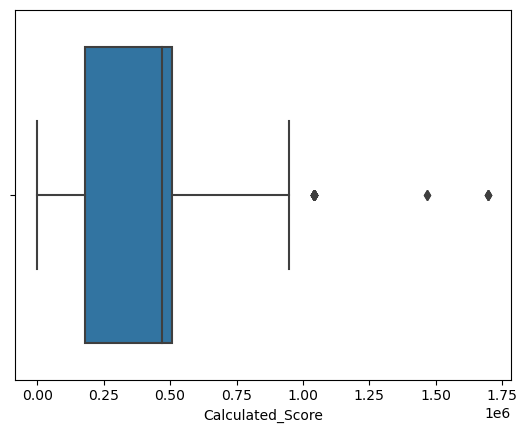

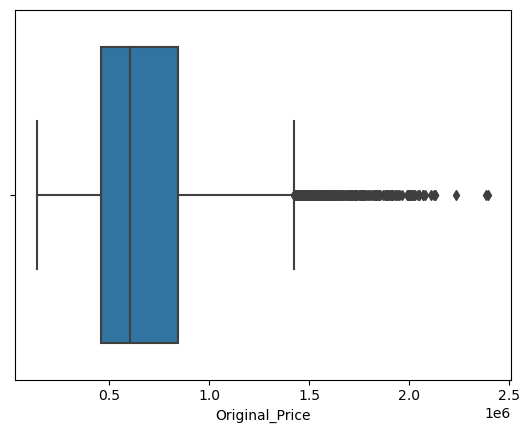

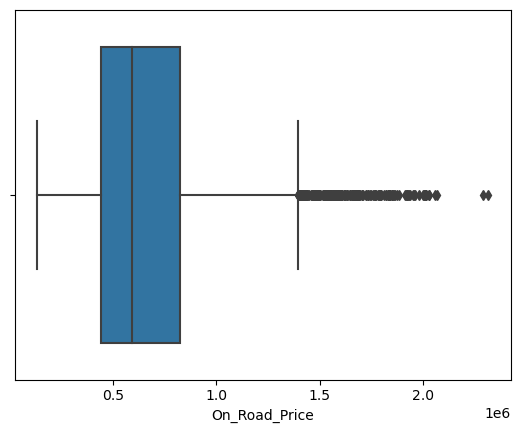

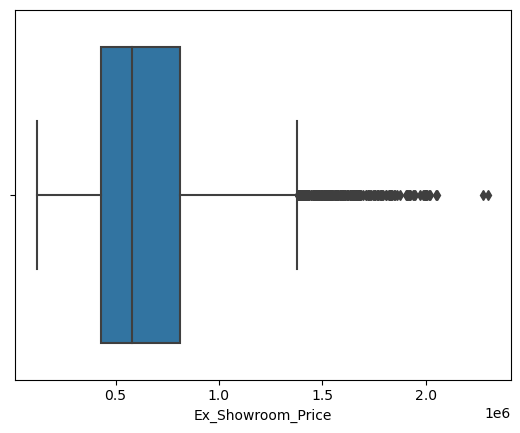

In [15]:
for i in df1.columns:
        sns.boxplot(df1[i])
        plt.show()

In [16]:
for i in df1.columns:
     print(df1[i].skew())

1.3628883455504899
1.6342873127929625
0.5341802215890942
1.4227395668968517
1.3687302637989114
1.3684963716316383


In [17]:
dff=df1.apply(lambda x:np.sqrt(x))
dff

,KM_Driven,No._of_Owners,Calculated_Score,Original_Price,On_Road_Price,Ex_Showroom_Price
0,54.258640,1.000000,688.476579,825.923120,784.091194,775.178044
1,281.682445,1.000000,845.576726,746.390648,695.915943,685.857857
2,51.224994,1.000000,684.105255,580.860568,580.860568,572.460479
3,104.656581,1.000000,374.165739,597.159108,597.159108,586.563722
4,146.338648,1.000000,688.476579,733.415980,729.999315,720.417240
...,...,...,...,...,...,...
4854,111.986606,1.000000,605.805249,762.167304,762.167304,755.785022
4855,208.988038,1.000000,411.096096,720.068747,720.068747,710.352729
4856,109.320629,1.000000,411.096096,880.908054,876.127274,870.580841
4857,235.116992,1.414214,561.248608,1175.542003,1175.542003,1167.258326


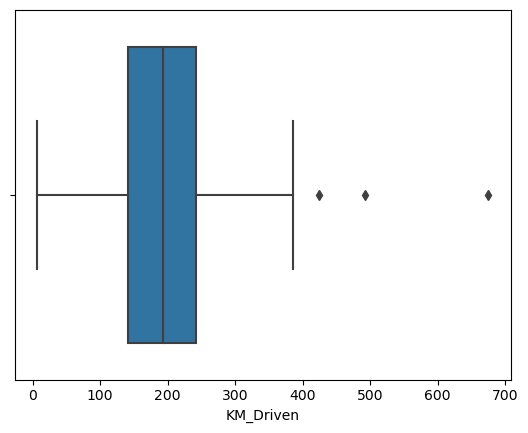

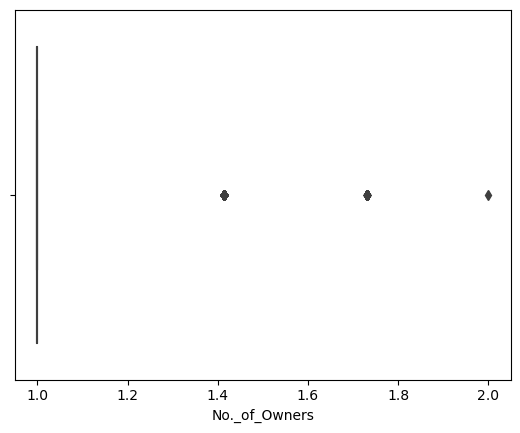

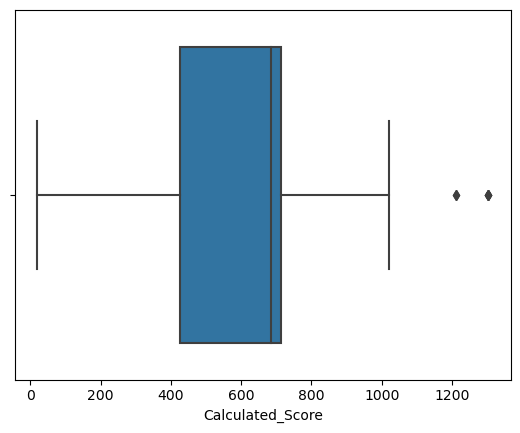

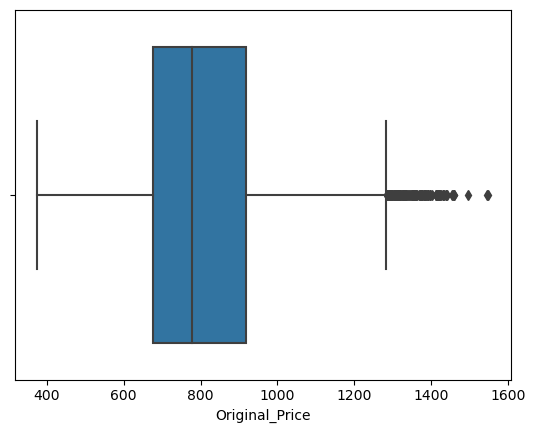

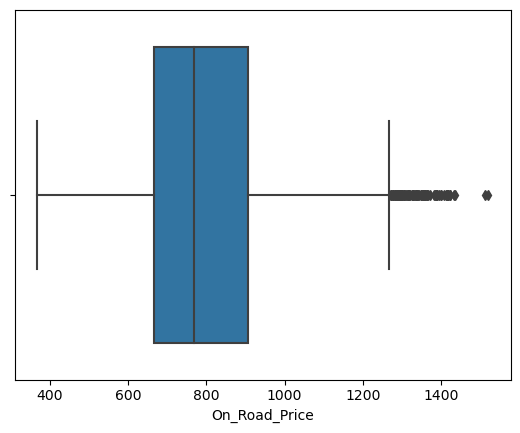

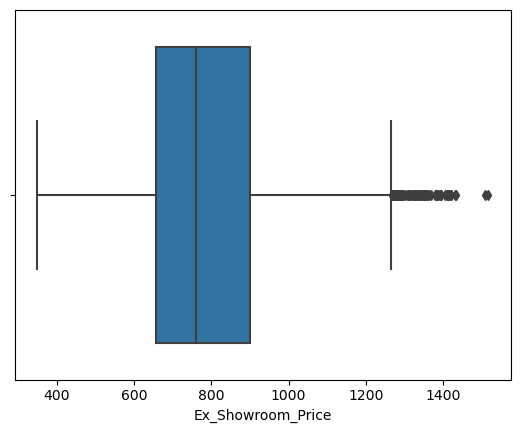

In [18]:
for i in dff.columns:
    sns.boxplot(dff[i])
    plt.show()

In [19]:
for i in dff.columns:
    print(dff[i].skew())

-0.04232511233136583
1.4811902714200973
-0.2008539809023508
0.8286686134065255
0.7752069527884474
0.7640181753572065


## Heatmap For Checking Multicolinarity 

<AxesSubplot:>

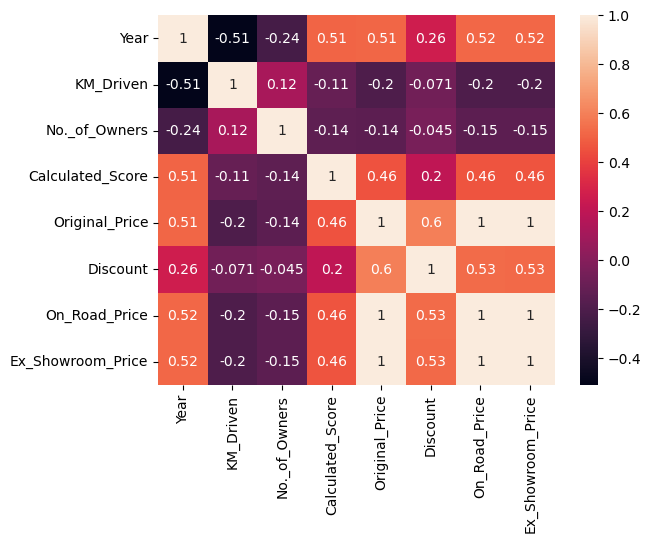

In [20]:
sns.heatmap(df3.corr(),annot=True)

In [21]:
df3.drop('Ex_Showroom_Price',axis=1,inplace=True)

In [22]:
df3

,Name,Company,City,Year,KM_Driven,No._of_Owners,Fuel_Type,Calculated_Score,Original_Price,Discount,On_Road_Price
0,MARUTISWIFT,MARUTI,Kolkata,2020,2944,1,Petrol,474000,682149,67350,614799
1,MARUTISWIFT,MARUTI,Kolkata,2018,79345,1,Petrol,715000,557099,72800,484299
2,HYUNDAIEON,HYUNDAI,Kolkata,2018,2624,1,Petrol,468000,337399,0,337399
3,MARUTIWAGON R 1.0,MARUTI,Kolkata,2014,10953,1,Petrol,140000,356599,0,356599
4,HYUNDAIELITE I20,HYUNDAI,Kolkata,2019,21415,1,Petrol,474000,537899,5000,532899
...,...,...,...,...,...,...,...,...,...,...,...
4854,HYUNDAINEW SANTRO,HYUNDAI,Ahmedabad,2019,12541,1,Petrol,367000,580899,0,580899
4855,HYUNDAIGRAND I10,HYUNDAI,Ahmedabad,2017,43676,1,Petrol,169000,518499,0,518499
4856,HONDAAMAZE,HONDA,New Delhi,2018,11951,1,Petrol,169000,775999,8400,767599
4857,MAHINDRAXUV500,MAHINDRA,New Delhi,2018,55280,2,Diesel,315000,1381899,0,1381899


<AxesSubplot:>

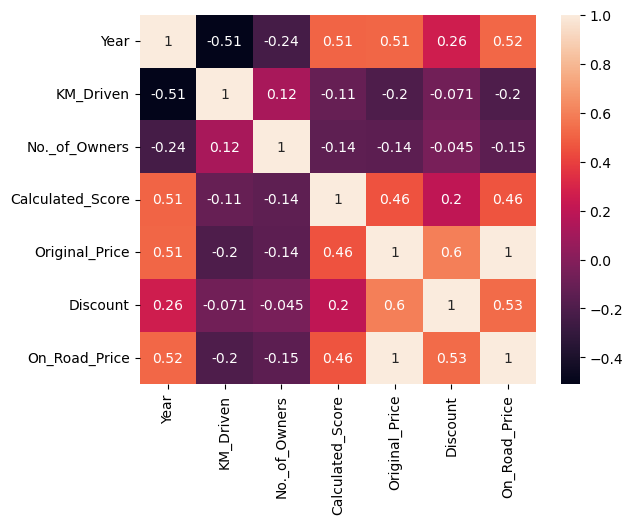

In [23]:
sns.heatmap(df3.corr(),annot=True)

# Splitting The Data Into Train And Test

In [24]:
x=df3.drop('On_Road_Price',axis=1)
y=df3['On_Road_Price']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

# Model Validation By Creating A Pipeline

# Preprocessing To Create A PipeLine

In [26]:
trf1=ColumnTransformer(transformers=[('encoding',OneHotEncoder(sparse=False,drop='first'),['Name','Company','City','Fuel_Type'])],remainder='passthrough')

In [27]:
trf1.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoding',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Name', 'Company', 'City', 'Fuel_Type'])])

In [28]:
df4=pd.DataFrame(trf1.transform(x_train))
df4

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2016.0,40139.0,1.0,362000.0,357499.0,5000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2014.0,92016.0,3.0,102000.0,414299.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2011.0,97157.0,1.0,507000.0,376799.0,28300.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2015.0,70844.0,2.0,1093.0,283799.0,5000.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2019.0,42538.0,1.0,507000.0,1173399.0,8100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2019.0,23525.0,1.0,474000.0,2012799.0,90000.0
3883,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2016.0,53951.0,1.0,181000.0,480999.0,34100.0
3884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2019.0,71968.0,1.0,715000.0,957899.0,61200.0
3885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2015.0,33684.0,2.0,181000.0,419699.0,19400.0


In [29]:
trf2=ColumnTransformer([('scale',MinMaxScaler(),slice(0,108))])

In [30]:
#Training with various model
trf4=LinearRegression()
trf5=rf()
trf6=DecisionTreeRegressor()
trf7=BaggingRegressor()
trf8=KNeighborsRegressor()
trf9=LinearSVR()

# Pipe Line For LinearRegressor

In [31]:
pipe=make_pipeline(trf1,trf2,trf4)

In [32]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('linearregression', LinearRegression())])

In [33]:
y_pred=pipe.predict(x_test)
#y_pred

Score 1.0
R2 Score 1.0
MSE 2.9227412133515085e-18


Text(0.5, 1.0, 'Distribution Of Residuals')

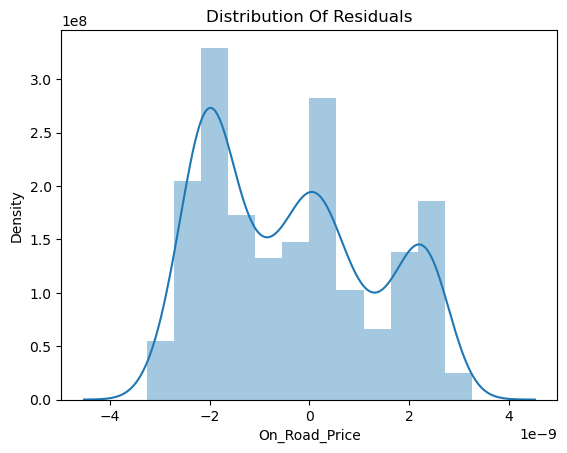

In [34]:
print('Score',pipe.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
sns.distplot(y_test-y_pred)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

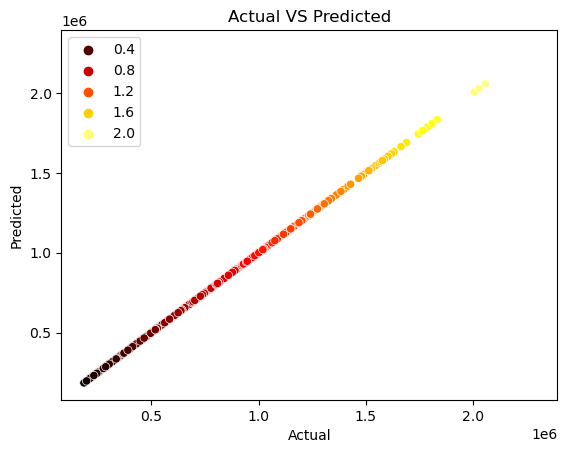

In [35]:
sns.scatterplot(y_test,y_pred,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Prediction:

In [36]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:15]

,Actual Value,Predicted Value,Difference
1683,636299,636299.0,1.280569e-09
3446,847299,847299.0,1.513399e-09
658,556999,556999.0,2.095476e-09
3627,449599,449599.0,2.211891e-09
4739,556599,556599.0,2.561137e-09
2089,350799,350799.0,-1.047738e-09
4735,518899,518899.0,2.444722e-09
939,1516299,1516299.0,4.656613e-10
2063,640899,640899.0,6.984919e-10
526,661199,661199.0,1.862645e-09


# Pipe Line For RandomForest

In [37]:
pipe1=make_pipeline(trf1,trf2,trf5)

In [38]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('randomforestregressor', RandomForestRegressor())])

In [39]:
y_pred1=pipe1.predict(x_test)
y_pred1

array([ 636498.  ,  859825.  ,  556499.  ,  450247.  ,  556624.  ,
        350983.5 ,  518234.  , 1503286.  ,  640922.  ,  661331.  ,
        523562.  ,  691271.  ,  631510.  ,  746297.  ,  424898.  ,
        355698.  ,  432229.  ,  886706.5 ,  317135.5 ,  622975.5 ,
        627088.  ,  982428.  ,  365636.  ,  587472.  ,  504671.  ,
        467495.  ,  676384.2 ,  900632.  ,  631446.  ,  404289.4 ,
        374563.  ,  448031.  ,  607987.5 ,  295854.  ,  248776.  ,
        870510.  ,  491191.5 ,  492233.  ,  430652.  ,  449357.  ,
        419705.  ,  682590.  ,  703924.  ,  590856.  ,  403762.  ,
        794451.  ,  921550.  ,  571087.  ,  906555.5 ,  645259.  ,
        252024.  ,  483057.5 ,  770277.  ,  450067.  ,  490866.  ,
       1074716.5 ,  749765.  ,  427223.5 ,  609518.3 ,  704935.  ,
        337922.  ,  491806.5 ,  848036.8 ,  460187.  ,  474808.21,
        614218.  , 1271044.5 ,  423276.  ,  671324.2 ,  506624.  ,
        413673.  ,  651847.  ,  438071.  ,  836450.  , 1094247

Score 0.9993322894953705
R2 Score 0.9993322894953705
MSE 73028425.31224784


Text(0.5, 1.0, 'Distribution Of Residuals')

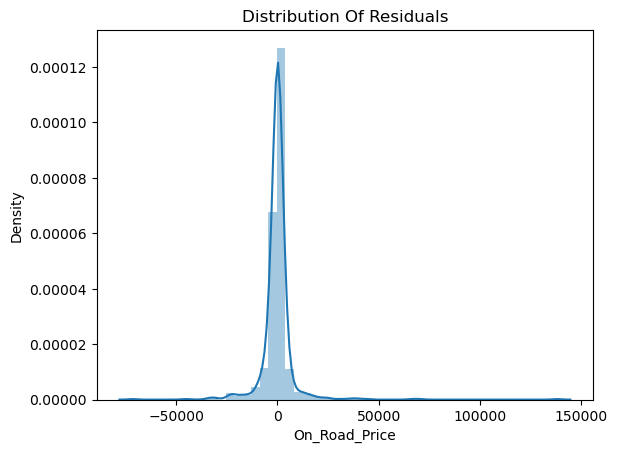

In [40]:
print('Score',pipe1.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred1))
print('MSE',mean_squared_error(y_test,y_pred1))
sns.distplot(y_test-y_pred1)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

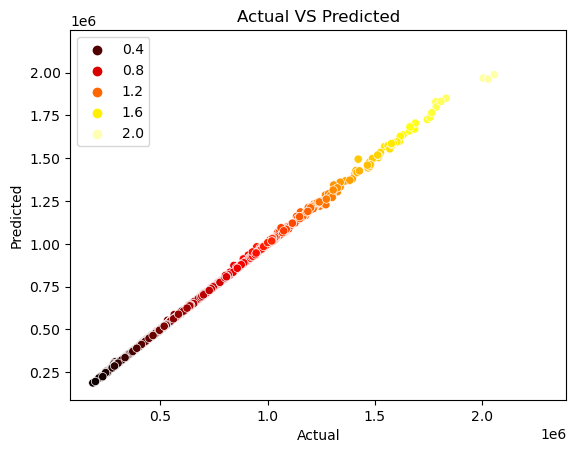

In [41]:
sns.scatterplot(y_test,y_pred1,hue=y_pred1,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Prediction

In [42]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred1,'Difference':y_test-y_pred1})
pred_y_df[0:15]

,Actual Value,Predicted Value,Difference
1683,636299,636498.0,-199.0
3446,847299,859825.0,-12526.0
658,556999,556499.0,500.0
3627,449599,450247.0,-648.0
4739,556599,556624.0,-25.0
2089,350799,350983.5,-184.5
4735,518899,518234.0,665.0
939,1516299,1503286.0,13013.0
2063,640899,640922.0,-23.0
526,661199,661331.0,-132.0


# Pipe Line For DecisionTree

In [43]:
pipe2=make_pipeline(trf1,trf2,trf6)

In [44]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [45]:
y_pred2=pipe2.predict(x_test)
y_pred2

array([ 636499.,  857799.,  555999.,  454599.,  556749.,  350599.,
        516599., 1491599.,  641699.,  661499.,  520399.,  693599.,
        636199.,  750199.,  428399.,  358799.,  429899.,  877699.,
        312499.,  624099.,  614299.,  983799.,  365199.,  582099.,
        504499.,  466599.,  676549.,  895699.,  631249.,  404899.,
        372599.,  441999.,  609649.,  296499.,  245899.,  870199.,
        493799.,  492699.,  430899.,  450699.,  420599.,  676599.,
        704099.,  587599.,  404699.,  783499.,  919199.,  571099.,
        910199.,  646399.,  253699.,  482999.,  770499.,  450699.,
        489099.,  990599.,  754199.,  425399.,  612999.,  711299.,
        338099.,  480699.,  850899.,  460699.,  475499.,  616699.,
       1278499.,  423499.,  671399.,  507099.,  417399.,  651699.,
        435599.,  827899., 1089999.,  648499.,  251299.,  563899.,
       1122499.,  952899.,  448699.,  533649.,  620599.,  468799.,
        442699.,  695999., 1195099.,  605799.,  862999.,  5244

Score 0.9983127335809233
R2 Score 0.9983127335809233
MSE 184538671.7942387


Text(0.5, 1.0, 'Distribution Of Residuals')

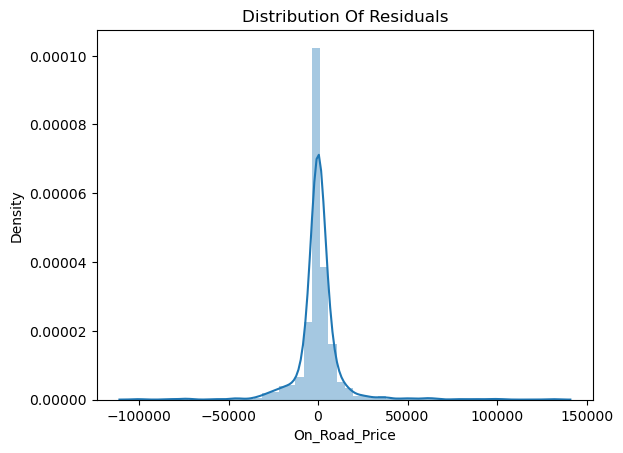

In [46]:
print('Score',pipe2.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred2))
print('MSE',mean_squared_error(y_test,y_pred2))
sns.distplot(y_test-y_pred2)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

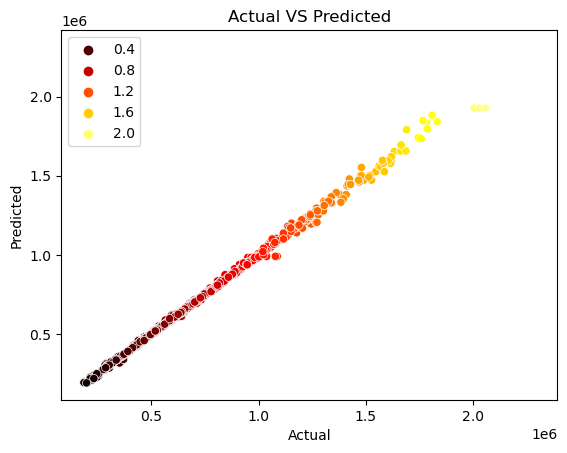

In [47]:
sns.scatterplot(y_test,y_pred2,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Prediction: 

In [48]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred2,'Difference':y_test-y_pred2})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1683,636299,636499.0,-200.0
3446,847299,857799.0,-10500.0
658,556999,555999.0,1000.0
3627,449599,454599.0,-5000.0
4739,556599,556749.0,-150.0


# Pipe Line For BaggingRegressor

In [49]:
pipe3=make_pipeline(trf1,trf2,trf7)

In [50]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('baggingregressor', BaggingRegressor())])

In [51]:
y_pred3=pipe3.predict(x_test)
y_pred3

array([ 636769. ,  860329. ,  556959. ,  452879. ,  557044. ,  351629. ,
        520054. , 1497969. ,  640619. ,  661259. ,  522579. ,  688629. ,
        634309. ,  752884. ,  422459. ,  355859. ,  431709. ,  891684. ,
        315469. ,  624339. ,  626299. ,  982149. ,  365349. ,  587019. ,
        504479. ,  468609. ,  673971. ,  898829. ,  630699. ,  404649. ,
        377524. ,  449209. ,  611804. ,  297759. ,  250269. ,  870289. ,
        489874. ,  492159. ,  430709. ,  454689. ,  419779. ,  675399. ,
        704459. ,  591949. ,  402399. ,  798149. ,  920449. ,  570774. ,
        907444. ,  648199. ,  250309. ,  483324. ,  775109. ,  448439. ,
        491029. , 1078469. ,  750404. ,  429294. ,  610129. ,  709489. ,
        337999. ,  494809. ,  846719. ,  459489. ,  474159. ,  616159. ,
       1278739. ,  422929. ,  671709. ,  507139. ,  411449. ,  651819. ,
        436069. ,  838009. , 1087569. ,  648369. ,  252519. ,  567929. ,
       1140779. ,  949709. ,  450799. ,  535534. , 

Score 0.9991440583507061
R2 Score 0.9991440583507061
MSE 93615527.04907407


Text(0.5, 1.0, 'Distribution of Residuals')

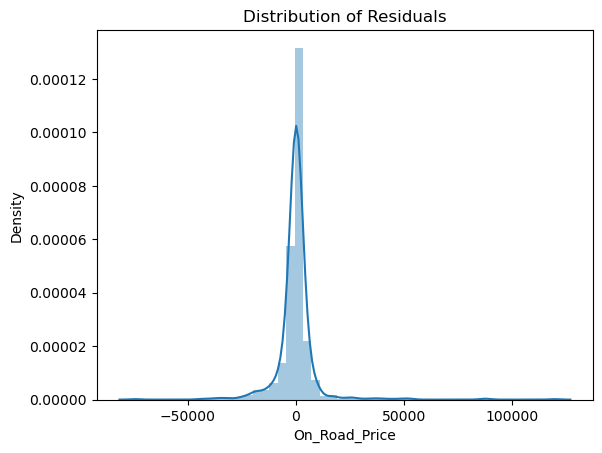

In [52]:
print('Score',pipe3.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred3))
print('MSE',mean_squared_error(y_test,y_pred3))
sns.distplot(y_test-y_pred3)
plt.title('Distribution of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

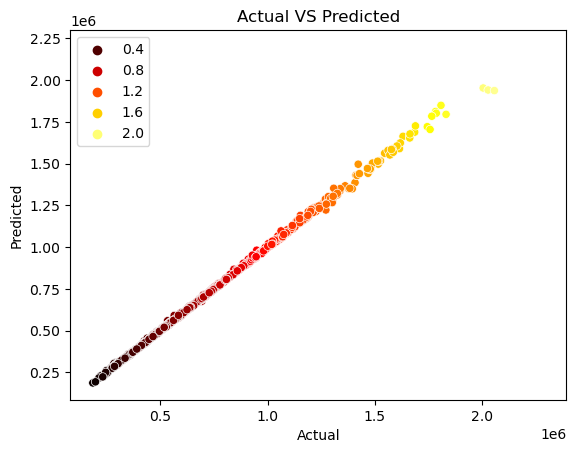

In [53]:
sns.scatterplot(y_test,y_pred3,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Prediction: 

In [54]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred3,'Difference':y_test-y_pred3})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1683,636299,636769.0,-470.0
3446,847299,860329.0,-13030.0
658,556999,556959.0,40.0
3627,449599,452879.0,-3280.0
4739,556599,557044.0,-445.0


# Pipe Line For KNeighborsRegressor

In [55]:
pipe4=make_pipeline(trf1,trf2,trf8)

In [56]:
pipe4.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [57]:
y_pred4=pipe4.predict(x_test)
y_pred4

array([ 731219. ,  850869. ,  508189. ,  460359. ,  627519. ,  460759. ,
        558019. , 1499469. ,  551789. ,  506939. ,  497069. ,  559459. ,
        628559. ,  721399. ,  435099. ,  639219. ,  421099. ,  776669. ,
        322819. ,  624379. ,  631739. , 1304459. ,  374859. ,  782699. ,
        528119. ,  834219. ,  813799. ,  950059. ,  687459. ,  381059. ,
        358789. ,  483079. ,  605359. ,  324659. ,  287419. ,  756179. ,
        496979. ,  496979. ,  388379. ,  534049. ,  465799. ,  643779. ,
        752799. ,  682189. ,  413579. ,  730539. ,  816539. ,  684599. ,
       1088389. ,  617879. ,  269179. ,  611039. ,  745989. ,  450007. ,
        501219. , 1036099. ,  821859. ,  412499. ,  513519. ,  615689. ,
        556839. ,  606879. , 1047239. ,  406279. ,  722579. ,  534959. ,
       1023919. ,  394159. ,  563779. ,  508649. ,  459229. ,  508299. ,
        481539. ,  954679. , 1418879. ,  755559. ,  266519. ,  697799. ,
       1250219. ,  973169. ,  444139. ,  631559. , 

Score 0.8545703310348561
R2 Score 0.8545703310348561
MSE 15905844890.21576


Text(0.5, 1.0, 'Distribution Of Residuals')

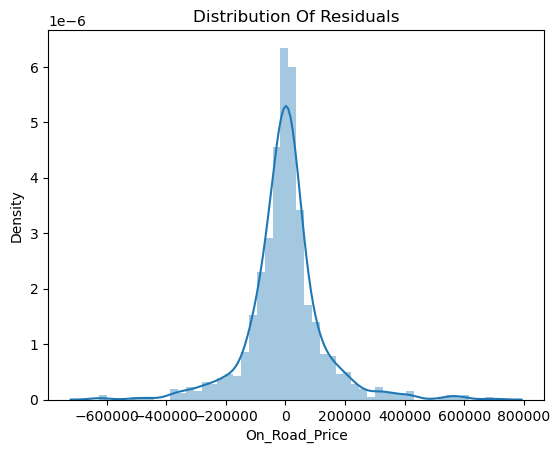

In [58]:
print('Score',pipe4.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred4))
print('MSE',mean_squared_error(y_test,y_pred4))
sns.distplot(y_test-y_pred4)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

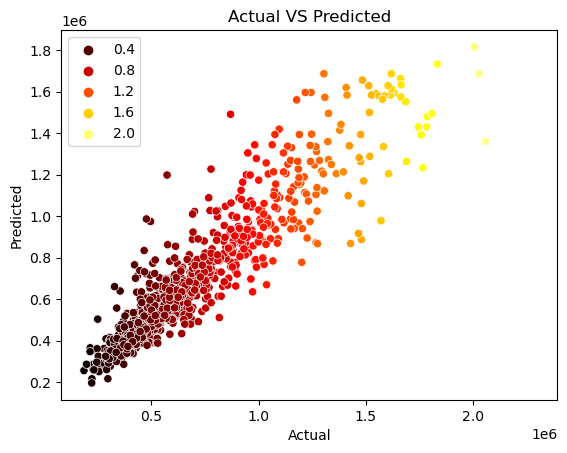

In [59]:
sns.scatterplot(y_test,y_pred4,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Predictions: 

In [60]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred4,'Difference':y_test-y_pred4})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1683,636299,731219.0,-94920.0
3446,847299,850869.0,-3570.0
658,556999,508189.0,48810.0
3627,449599,460359.0,-10760.0
4739,556599,627519.0,-70920.0


# Pipe Line For Support Vactor Regressor

In [61]:
pipe5=make_pipeline(trf1,trf2,trf9)

In [62]:
pipe5.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Name', 'Company', 'City',
                                                   'Fuel_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 108, None))])),
                ('linearsvr', LinearSVR())])

In [63]:
y_pred5=pipe5.predict(x_test)
y_pred5

array([11067.00218821, 11185.25720963, 11220.13367457, 10482.58943447,
        7348.17493286,  8795.67459445, 10882.3168096 ,  7746.71417738,
       10170.19869354, 11205.23146765, 10725.26261245, 12078.83707722,
       10070.51292804, 10479.29183774,  6851.58754186,  8875.45105241,
       11592.85288764, 12289.33923546, 11224.34325492, 11107.10144012,
       11592.77451932,  8288.93247269,  9913.28926334, 10109.99211105,
       11738.61645023,  8621.2697044 , 11755.8484346 , 10989.40811377,
        9979.12405532, 10457.90387228, 10804.00600085, 10823.65884083,
       10194.10036579, 10332.87791626, 10536.65472082, 11996.11315422,
       12228.48425222, 11830.80283709,  9342.91332944, 11310.39170527,
        9182.21383032, 11684.28974752,  6490.88763096, 11623.44878451,
       11658.9063183 , 12891.15233318, 11642.03833981,  9859.01418588,
       10831.38916805, 11386.75945836, 10134.50350651, 10210.62001241,
       11638.59930777,  8005.93938231, 11922.47548238,  7244.16136825,
      

Score -4.022802907226186
R2 Score -4.022802907226186
MSE 549350930418.5568


Text(0.5, 1.0, 'Distribution Of Residuals')

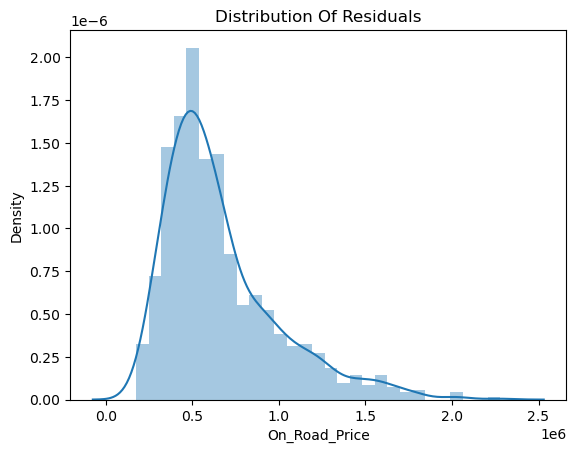

In [64]:
print('Score',pipe5.score(x_test,y_test))
print('R2 Score',r2_score(y_test,y_pred5))
print('MSE',mean_squared_error(y_test,y_pred5))
sns.distplot(y_test-y_pred5)
plt.title('Distribution Of Residuals')

Text(0.5, 1.0, 'Actual VS Predicted')

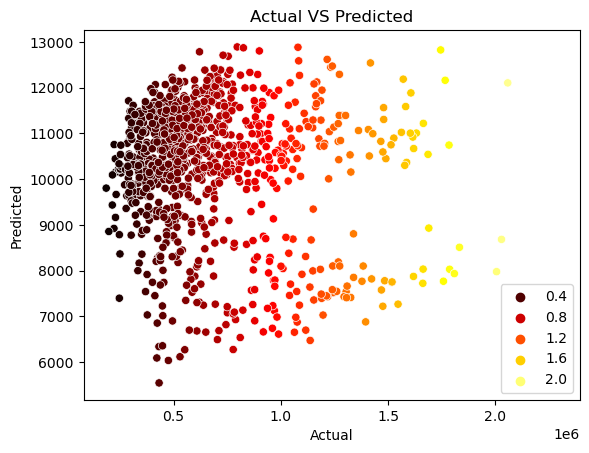

In [65]:
sns.scatterplot(y_test,y_pred5,hue=y_pred,palette='hot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

## Predictions: 

In [66]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred5,'Difference':y_test-y_pred5})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
1683,636299,11067.002188,625231.997812
3446,847299,11185.257210,836113.742790
658,556999,11220.133675,545778.866325
3627,449599,10482.589434,439116.410566
4739,556599,7348.174933,549250.825067


In [67]:
pd.DataFrame({'Model':['Liner Regression','Random Forest','Decision Tree','Bagging','KNN','SVM'],'R2 Values':[1,0.999,0.998,0.999,0.86,-4.15],'MSE':[1.9002347595899853e-18,50739639.12,133721073.73,66519322.50,13848018802.81, 545861380131.2092]})

,Model,R2 Values,MSE
0,Liner Regression,1.000,1.900235e-18
1,Random Forest,0.999,5.073964e+07
2,Decision Tree,0.998,1.337211e+08
3,Bagging,0.999,6.651932e+07
4,KNN,0.860,1.384802e+10
5,SVM,-4.150,5.458614e+11


In [68]:
import pickle
pickle.dump(df3,open('df3.pkl','wb'))